In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings( 'ignore' )

import matplotlib.pyplot as plt
%matplotlib inline
import os 
import sys
import seaborn as sns
import math

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_pickle('/content/gdrive/MyDrive/TASK2-wafer map /LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df[['trianTestLabel', 'failureType']] = df[['trianTestLabel', 'failureType']].astype(str)
df.trianTestLabel = df.trianTestLabel.replace('[]', 'Unspecified')
df.trianTestLabel = df.trianTestLabel.replace("[['Training']]", 'Training')
df.trianTestLabel = df.trianTestLabel.replace("[['Test']]", 'Test')
df.trianTestLabel.value_counts()

Unspecified    638507
Test           118595
Training        54355
Name: trianTestLabel, dtype: int64

In [5]:
df.failureType = df.failureType.replace('[]', 'Unspecified')
df.failureType = df.failureType.replace("[['none']]", 'none')
df.failureType = df.failureType.replace("[['Edge-Ring']]", 'Edge-Ring')
df.failureType = df.failureType.replace("[['Edge-Loc']]", 'Edge-Loc')
df.failureType = df.failureType.replace("[['Center']]", 'Center')
df.failureType = df.failureType.replace("[['Loc']]", 'Loc')
df.failureType = df.failureType.replace("[['Scratch']]", 'Scratch')
df.failureType = df.failureType.replace("[['Random']]", 'Random')
df.failureType = df.failureType.replace("[['Donut']]", 'Donut')
df.failureType = df.failureType.replace("[['Near-full']]",'Near-full')
df.failureType.value_counts()

Unspecified    638507
none           147431
Edge-Ring        9680
Edge-Loc         5189
Center           4294
Loc              3593
Scratch          1193
Random            866
Donut             555
Near-full         149
Name: failureType, dtype: int64

In [6]:
df = df.drop(['dieSize', 'lotName', 'waferIndex'], axis='columns')

In [7]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

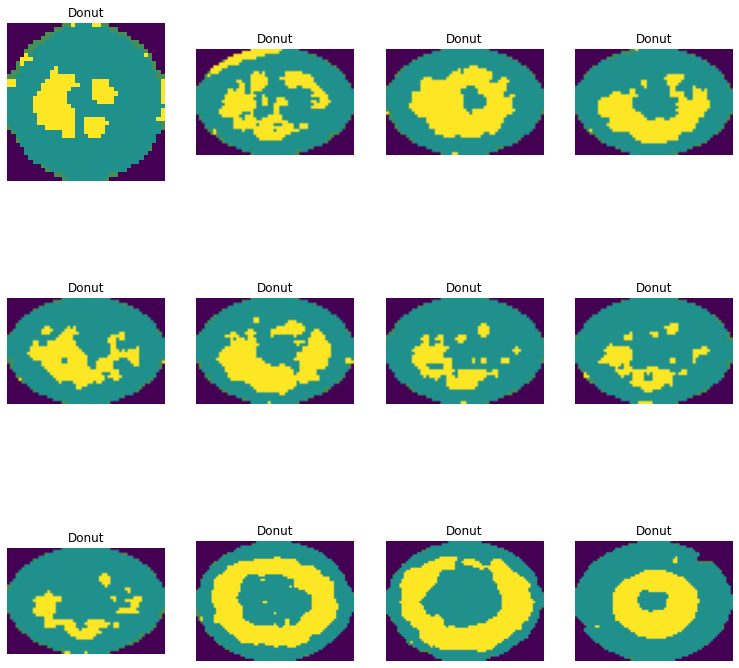

In [8]:
rows = 3
cols = 4
mbk = 3      # 미디안 블러 커널 사이즈
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Donut']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    #img = img.resize((256,256))
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

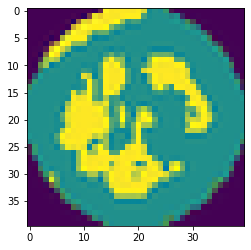

In [9]:
index = df.index[df['failureType'] == 'Donut']
PPP = df.waferMap[index[1]]
#plt.imshow(PPP)
#plt.close()
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
#cv2_imshow(median)
#plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
#plt.title('PPP') # 제목 추가
#plt.axis("off") # 축 제거
#plt.show()
plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
#plt.close()
img = Image.open("PPP.png")
img_resize = img.resize((40,40), Image.LANCZOS)
img_resize.save("PPP.png")
img = cv2.imread('PPP.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
index = df.index[df['trianTestLabel'] == 'Training']
Training_df = df.loc[index, :]
Training_df.head()

,waferMap,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Training,none


In [11]:
index = df.index[df['trianTestLabel'] == 'Test']
Test_df = df.loc[index, :]
Test_df.head()

,waferMap,trianTestLabel,failureType
639663,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",Test,none
639664,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",Test,none
639665,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",Test,none
639666,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,...",Test,none
639667,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",Test,none


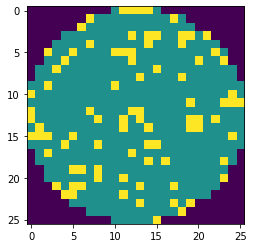

In [12]:
#Test_df.waferMap.iloc[0]
PPP = Test_df.waferMap.iloc[0]
plt.imshow(PPP)

In [13]:
index = Training_df.index[Training_df['failureType'] == 'Donut']
print(index)
sample_df = Training_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
#PPP = sample_df.waferMap[0]
#plt.imshow(PPP)

Int64Index([  7316,   7334,   7335,   7338,   7339,   7340,   7342,   7346,
              7348,   7877,
            ...
            674138, 674139, 674140, 674141, 674142, 674143, 674144, 674145,
            746172, 747563],
           dtype='int64', length=409)


In [19]:
index = Training_df.index[Training_df['failureType'] == 'none']
sample_df = Training_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)

for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/none/%d.png")' % i
  exec(s1)

In [20]:

print(len(index))



36730

In [21]:
index = Training_df.index[Training_df['failureType'] == 'Center']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Center/%d.png")' % i
  exec(s1)

3462


In [22]:
index = Training_df.index[Training_df['failureType'] == 'Donut']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Donut/%d.png")' % i
  exec(s1)

409


In [23]:
index = Training_df.index[Training_df['failureType'] == 'Edge-Loc']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Edge-Loc/%d.png")' % i
  exec(s1)

2417


In [24]:
index = Training_df.index[Training_df['failureType'] == 'Edge-Ring']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Edge-Ring/%d.png")' % i
  exec(s1)

8554


In [25]:
index = Training_df.index[Training_df['failureType'] == 'Loc']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Loc/%d.png")' % i
  exec(s1)

1620


In [26]:
index = Training_df.index[Training_df['failureType'] == 'Near-full']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Near-full/%d.png")' % i
  exec(s1)

54


In [27]:
index = Training_df.index[Training_df['failureType'] == 'Random']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Random/%d.png")' % i
  exec(s1)

609


In [28]:
index = Training_df.index[Training_df['failureType'] == 'Scratch']
sample_df = Training_df.loc[index, :]
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Training/Scratch/%d.png")' % i
  exec(s1)

500


In [26]:
index = Test_df.index[Test_df['failureType'] == 'none']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(33742, len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/none/%d.png")' % i
  exec(s1)

110701


In [22]:
index = Test_df.index[Test_df['failureType'] == 'Edge-Ring']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Edge-Ring/%d.png")' % i
  exec(s1)

1126


In [21]:
index = Test_df.index[Test_df['failureType'] == 'Edge-Loc']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Edge-Loc/%d.png")' % i
  exec(s1)

2772


In [20]:
index = Test_df.index[Test_df['failureType'] == 'Center']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Center/%d.png")' % i
  exec(s1)

832


In [19]:
index = Test_df.index[Test_df['failureType'] == 'Loc']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Loc/%d.png")' % i
  exec(s1)

1973


In [18]:
index = Test_df.index[Test_df['failureType'] == 'Scratch']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Scratch/%d.png")' % i
  exec(s1)

693


In [17]:
index = Test_df.index[Test_df['failureType'] == 'Random']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Random/%d.png")' % i
  exec(s1)

257


In [16]:
index = Test_df.index[Test_df['failureType'] == 'Donut']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Donut/%d.png")' % i
  exec(s1)

146


In [25]:
index = Test_df.index[Test_df['failureType'] == 'Near-full']
sample_df = Test_df.loc[index, :]
#sample_df = pd.DataFrame(sample_df)
print(len(index))


for i in range(len(index)):
  PPP = sample_df.waferMap.iloc[i]
  plt.imsave("PPP.png",PPP)
  img = cv2.imread('PPP.png')
  median = cv2.medianBlur(img, 3)
  plt.imsave("PPP.png",cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
  img = Image.open("PPP.png")
  img_resize = img.resize((40,40), Image.LANCZOS)
  s1 = 'img_resize.save("/content/gdrive/MyDrive/TNT_TASK2/Test/Near-full/%d.png")' % i
  exec(s1)

95


In [62]:
import pathlib
Training_dir = "/content/gdrive/MyDrive/TNT_TASK2/Training"
Test_dir = "/content/gdrive/MyDrive/TNT_TASK2/Test"

from keras_preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)

In [63]:
train_generator = data_generator.flow_from_directory(Training_dir,
                                                     target_size=(40,40),
                                                     batch_size=1,
                                                     class_mode='sparse')


Found 54355 images belonging to 9 classes.


In [55]:
x_train, y_train = train_generator.next()
y_train = y_train.reshape(1,9)

(40, 40, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0.]


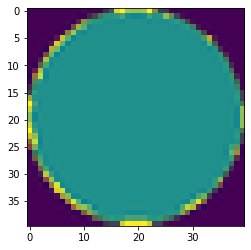

In [35]:
print(x_train[0].shape)
print(y_train[0])
plt.imshow(x_train[0])
plt.show()

In [67]:
from tensorflow import keras
num_classes = 9

model = keras.models.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.InputLayer(input_shape=(40, 40, 3)),
  keras.layers.Conv2D(40, 3, padding='same'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(20, 3, padding='same', activation='elu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(40, activation='elu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(20, activation='elu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units = num_classes, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=2
history = model.fit(
  train_generator,
  epochs=epochs
)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 40, 40, 40)        1120      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 20, 20, 40)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 20, 20, 20)        7220      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 10, 10, 20)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2000)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 40)                80040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)              

UnknownError: ignored

In [ ]:
test_generator = data_generator.flow_from_directory(Test_dir,
                                                     target_size=(40,40),
                                                     batch_size=1,
                                                     class_mode='sparse')

In [ ]:
model.evaluate(test_generator)